# Import Libraries

In [ ]:
# Import Libraries

# For EDA
import pandas as pd
import numpy as np
import re
import missingno as msno

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import nltk
import time
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

#For Pre-Processing
import pandas as pd
import numpy as np
import re
from sklearn import preprocessing

import torch
import torchvision
import random
import os

import plotly.express as px
import matplotlib.pyplot as plt

import nltk
from sklearn.feature_selection import chi2
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
!pip install contractions
import contractions
import re
import string

#For Modeling
from tqdm.auto import tqdm
import gensim
from gensim import corpora
from gensim.models import TfidfModel, LdaModel, CoherenceModel
!pip install bertopic
from bertopic import BERTopic
from bertopic.cluster import BaseCluster
from bertopic.representation import KeyBERTInspired
from sentence_transformers import SentenceTransformer
!pip install umap-learn
from umap import UMAP
from hdbscan import HDBSCAN

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 3.5 MB/s eta 0:00:00


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 14.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.4/143.4 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 84.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached Cython-0.29.36-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.manylinux_2_24_x86_64.whl (1.9 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 105.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 76.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 33.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB

In [ ]:
def set_seed(seed):
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    np.random.seed(seed)
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)

In [ ]:
set_seed(1505)

# Import Data

In [ ]:
berita = pd.read_excel('turnbackhoax 2023.xlsx')

In [ ]:
berita.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Penulis danatau Editor  1608 non-null   object
 1   Tanggal Artikel         1608 non-null   object
 2   URL                     1608 non-null   object
 3   Judul                   1608 non-null   object
 4   Isi                     1608 non-null   object
dtypes: object(5)
memory usage: 62.9+ KB


In [ ]:
data = berita[['Isi']]

In [ ]:
data

,Isi
0,\nHendri Sepata mengklarifikasi bahwa akun W...
1,\nDinas Pendidikan Provinsi Kalimantan Tenga...
2,\nApolo Safanpo mengonfirmasi bahwa akunakun...
3,\nPesan palsu Kementerian Kesehatan RI memas...
4,\nMelalui akun media sosial resminya Karna S...
...,...
1603,\nFaktanya tidak ada pemberitaan valid yang m...
1604,Pandan Wangi Sukma Listyono Putri\nPostingan ...
1605,Hasil periksafakta \nKonten yang dimanipulasi ...
1606,BUKAN Perda yang dikeluarkan oleh Walikota Sur...


In [ ]:
#Jumlah baris dan kolom dari dataset
data.shape

(1608, 1)

In [ ]:
#Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Isi     1608 non-null   object
dtypes: object(1)
memory usage: 12.7+ KB


In [ ]:
#Dataset Duplicate Value Count
berita.duplicated().sum()

0

In [ ]:
#Missing Values/Null Values Count
data.isnull().sum()

Isi    0
dtype: int64

In [ ]:
# Import data
berita = pd.read_excel('turnbackhoax 2023.xlsx')

# Informasi umum mengenai dataset
berita.info()

# Jumlah baris dan kolom dari dataset
data.shape

# Pengecekan data duplikasi
berita.duplicated().sum()

# Pengecekan missing value
data.isnull().sum()

# Text Pre-processing

1. Menghilangkan simbol khusus seperti \r, \n, ", url, dan byte code

In [ ]:
# TEXT PRE-PROCESSING
# Menghilangkan simbol khusus seperti \r, \n, ", url, dan byte code
def cleaning(data):
    data['Judul_Parsed_1'] = data['Isi'].str.replace("\\\\r", " ")
    data['Judul_Parsed_1'] = data['Judul_Parsed_1'].str.replace("\\\\n", " ")
    data['Judul_Parsed_1'] = data['Judul_Parsed_1'].str.replace("\n", " ")
    data['Judul_Parsed_1'] = data['Judul_Parsed_1'].str.replace("\r", " ")
    data['Judul_Parsed_1'] = data['Judul_Parsed_1'].str.replace("&amp", " ")
    data['Judul_Parsed_1'] = data['Judul_Parsed_1'].str.replace("&gt", " ")
    data['Judul_Parsed_1'] = data['Judul_Parsed_1'].str.replace("&lt", " ")
    data['Judul_Parsed_1'] = data['Judul_Parsed_1'].str.replace("    ", " ")
    data['Judul_Parsed_1'] = data['Judul_Parsed_1'].str.replace(r'''(?i)\b((?:https|http?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ")
    data['Judul_Parsed_1'] = data['Judul_Parsed_1'].str.replace('"', '')
    data['Judul_Parsed_1'] = data['Judul_Parsed_1'].str.replace("\\\\x[a-zA-z0-9][a-zA-z0-9]","")
    return data

In [ ]:
data = cleaning(data)
data['Judul_Parsed_1'].head()

0       Hendri Sepata mengklarifikasi bahwa akun Wh...
1       Dinas Pendidikan Provinsi Kalimantan Tengah...
2       Apolo Safanpo mengonfirmasi bahwa akunakun ...
3       Pesan palsu Kementerian Kesehatan RI memast...
4       Melalui akun media sosial resminya Karna Su...
Name: Judul_Parsed_1, dtype: object

2. Mengubah menjadi *lower case*

In [ ]:
# Mengubah menjadi lower case
def lowerCase(data):
    data['Judul_Parsed_2'] = data['Judul_Parsed_1'].str.lower()
    return data

In [ ]:
data = lowerCase(data)
data['Judul_Parsed_2'].head()

0       hendri sepata mengklarifikasi bahwa akun wh...
1       dinas pendidikan provinsi kalimantan tengah...
2       apolo safanpo mengonfirmasi bahwa akunakun ...
3       pesan palsu kementerian kesehatan ri memast...
4       melalui akun media sosial resminya karna su...
Name: Judul_Parsed_2, dtype: object

3. Menghapus simbol dan tanda baca

In [ ]:
# Menghapus simbol dan tanda baca
def removePunct(data):
    data['Judul_Parsed_3'] = data['Judul_Parsed_2']
    data['Judul_Parsed_3'] = data['Judul_Parsed_3'].str.replace("'s","")
    data['Judul_Parsed_3'] = data['Judul_Parsed_3'].str.replace('[^a-zA-Z0-9]+',' ')
    return data

In [ ]:
data = removePunct(data)
data['Judul_Parsed_3'].head()

0     hendri sepata mengklarifikasi bahwa akun what...
1     dinas pendidikan provinsi kalimantan tengah m...
2     apolo safanpo mengonfirmasi bahwa akunakun ya...
3     pesan palsu kementerian kesehatan ri memastik...
4     melalui akun media sosial resminya karna susw...
Name: Judul_Parsed_3, dtype: object

4. Normalisasi kata

In [ ]:
# Normalisasi kata
kamus_normal = pd.read_csv("kamusnormalisasi.csv",encoding='latin-1',header=None,names=["non-standard word","standard word"])
kamus_normal.head()

,non-standard word,standard word
0,27-Jun,dua puluh tujuh juni
1,01curang,01 curang
2,01thechampion,01 the champion
3,02wintheelection,02 win the election
4,Â½ramayana,ramayana


In [ ]:
nonstdword = kamus_normal['non-standard word'].values.tolist()
stdword = kamus_normal['standard word'].values.tolist()

In [ ]:
def normalize_text(text, stdword_, nonstdword_):
    text = text.split(" ")
    for i in range(len(text)):
        if text[i] in nonstdword_:
            index = nonstdword_.index(text[i])
            text[i] = stdword_[index]
    return ' '.join(map(str, text))

def normalizeData(data, stdword_, nonstdword_):
    data['Judul_Parsed_4'] = data['Judul_Parsed_3']
    data['Judul_Parsed_4'] = data['Judul_Parsed_4'].map(lambda com : normalize_text(com,stdword_,nonstdword_))
    return data

In [ ]:
data = normalizeData(data, stdword, nonstdword)
data['Judul_Parsed_4'].head()

0     hendri sepatah mengklarifikasi bahwa akun wha...
1     dinas pendidikan provinsi kalimantan tengah m...
2     apolo safanpo mengonfirmasi bahwa akunakun ya...
3     pesan palsu kementerian kesehatan republik in...
4     melalui akun media sosial resminya karena sus...
Name: Judul_Parsed_4, dtype: object

5. Menghilangkan angka

In [ ]:
# Menghilangkan angka
def removeNumb(data):
    data['Judul_Parsed_4'] = data['Judul_Parsed_4'].str.replace('[^a-zA-Z]+',' ')
    return data

In [ ]:
data = removeNumb(data)
data['Judul_Parsed_4'].head()

0     hendri sepatah mengklarifikasi bahwa akun wha...
1     dinas pendidikan provinsi kalimantan tengah m...
2     apolo safanpo mengonfirmasi bahwa akunakun ya...
3     pesan palsu kementerian kesehatan republik in...
4     melalui akun media sosial resminya karena sus...
Name: Judul_Parsed_4, dtype: object

6. Menghapus Multiple Whitespace

In [ ]:
# Menghapus Multiple Whitespace
def remove_multiple_whitespace(text):
  text = re.sub('\s+',' ',text)
  return text.translate(str.maketrans("","",string.punctuation))

In [ ]:
data['Judul_Parsed_4'] = data.Judul_Parsed_4.apply(remove_multiple_whitespace)
data['Judul_Parsed_4']

0        hendri sepatah mengklarifikasi bahwa akun wha...
1        dinas pendidikan provinsi kalimantan tengah m...
2        apolo safanpo mengonfirmasi bahwa akunakun ya...
3        pesan palsu kementerian kesehatan republik in...
4        melalui akun media sosial resminya karena sus...
                              ...                        
1603     faktanya tidak ada pemberitaan valid yang mem...
1604     pandan wangi sukma listyono putri postingan d...
1605    hasil periksafakta konten yang dimanipulasi vi...
1606    bukan peraturan daerah yang dikeluarkan oleh w...
1607     konten palsu pt kamu tidak pernah membagikan ...
Name: Judul_Parsed_4, Length: 1608, dtype: object

7. Menghilangkan kata tidak bermakna (*stopwords*)

In [ ]:
list(stopwords.words('indonesian'))

['ada',
 'adalah',
 'adanya',
 'adapun',
 'agak',
 'agaknya',
 'agar',
 'akan',
 'akankah',
 'akhir',
 'akhiri',
 'akhirnya',
 'aku',
 'akulah',
 'amat',
 'amatlah',
 'anda',
 'andalah',
 'antar',
 'antara',
 'antaranya',
 'apa',
 'apaan',
 'apabila',
 'apakah',
 'apalagi',
 'apatah',
 'artinya',
 'asal',
 'asalkan',
 'atas',
 'atau',
 'ataukah',
 'ataupun',
 'awal',
 'awalnya',
 'bagai',
 'bagaikan',
 'bagaimana',
 'bagaimanakah',
 'bagaimanapun',
 'bagi',
 'bagian',
 'bahkan',
 'bahwa',
 'bahwasanya',
 'baik',
 'bakal',
 'bakalan',
 'balik',
 'banyak',
 'bapak',
 'baru',
 'bawah',
 'beberapa',
 'begini',
 'beginian',
 'beginikah',
 'beginilah',
 'begitu',
 'begitukah',
 'begitulah',
 'begitupun',
 'bekerja',
 'belakang',
 'belakangan',
 'belum',
 'belumlah',
 'benar',
 'benarkah',
 'benarlah',
 'berada',
 'berakhir',
 'berakhirlah',
 'berakhirnya',
 'berapa',
 'berapakah',
 'berapalah',
 'berapapun',
 'berarti',
 'berawal',
 'berbagai',
 'berdatangan',
 'beri',
 'berikan',
 'berikut'

In [ ]:
# Menghilangkan kata tidak bermakna (stopwords)
meaningless = pd.read_csv("new_stopword.csv",header=None,names=['stopword'])

stop_words = list(stopwords.words('indonesian')) + list(stopwords.words('english'))

meaningless = meaningless['stopword'].tolist()
meaningless = meaningless + stop_words

In [ ]:
def removeMeaningless(data,meaningless_):
    for word in meaningless_:
        regex_meaningless = r"\b" + word + r"\b"
        data['Judul_Parsed_4'] = data['Judul_Parsed_4'].str.replace(regex_meaningless, '')
    return data

In [ ]:
data = removeMeaningless(data,meaningless)
data['Judul_Parsed_4'].head()

0     hendri sepatah mengklarifikasi  akun whatsapp...
1     dinas pendidikan provinsi kalimantan  mengkla...
2     apolo safanpo mengonfirmasi  akunakun  bereda...
3     pesan palsu kementerian kesehatan republik in...
4      akun media sosial resminya  suswandi   akun ...
Name: Judul_Parsed_4, dtype: object

8. Menghilangkan imbuhan (*stemming*)

In [ ]:
# Menghilangkan imbuhan (stemming)
wn= nltk.WordNetLemmatizer()
def lemmatization(text):
    text = ' '.join(wn.lemmatize(word) for word in text.split() if word in text)
    return text
# Buat kolom tambahan untuk data description yang telah dilemmatization
data['Judul_Parsed_5'] = data['Judul_Parsed_4'].apply(lemmatization)
data['Judul_Parsed_5']

0       hendri sepatah mengklarifikasi akun whatsapp b...
1       dinas pendidikan provinsi kalimantan mengklari...
2       apolo safanpo mengonfirmasi akunakun beredar p...
3       pesan palsu kementerian kesehatan republik ind...
4       akun medium sosial resminya suswandi akun what...
                              ...                        
1603    faktanya pemberitaan valid membenarkan mahfud ...
1604    pandan wangi sukma listyono putri postingan kl...
1605    hasil periksafakta konten dimanipulasi video e...
1606    peraturan daerah dikeluarkan wali kota surakar...
1607    konten palsu pt membagikan kuesioner berhadiah...
Name: Judul_Parsed_5, Length: 1608, dtype: object

In [ ]:
wordnet_lemmatizer = WordNetLemmatizer()
factory = StemmerFactory()
stemmerID = factory.create_stemmer()

In [ ]:
def stemming(text, stemmer_id):
    text_split = text.split(" ")
    stemmed_list = []
    for i in text_split:
        stem_text1 = stemmer_id.stem(i)
        stemmed_list.append(stem_text1)
    stemmed = ' '.join(map(str,stemmed_list))
    return stemmed

def stemData(data, stemmer_id):
    data['Judul_Parsed_5'] = data['Judul_Parsed_4']
    data['Judul_Parsed_5'] = data['Judul_Parsed_5'].map(lambda com : stemming(com,stemmer_id))
    return data

In [ ]:
data = stemData(data, stemmerID)
data['Judul_Parsed_5'].head()

0     hendri patah klarifikasi  akun whatsapp  edar...
1     dinas didik provinsi kalimantan  klarifikasi ...
2     apolo safanpo konfirmasi  akunakun  edar  pal...
3     pesan palsu menteri sehat republik indonesia ...
4      akun media sosial resmi  suswandi   akun wha...
Name: Judul_Parsed_5, dtype: object

9. Remove certain words

In [ ]:
data['Judul_Parsed_5']=data['Judul_Parsed_5'].str.replace("hasil periksa fakta"," ", regex=True)
data['Judul_Parsed_5'].head()

0     hendri patah klarifikasi  akun whatsapp  edar...
1     dinas didik provinsi kalimantan  klarifikasi ...
2     apolo safanpo konfirmasi  akunakun  edar  pal...
3     pesan palsu menteri sehat republik indonesia ...
4      akun media sosial resmi  suswandi   akun wha...
Name: Judul_Parsed_5, dtype: object

In [ ]:
data['Judul_Parsed_5']=data['Judul_Parsed_5'].str.replace("salah"," ", regex=True)
data['Judul_Parsed_5'].head()

0     hendri patah klarifikasi  akun whatsapp  edar...
1     dinas didik provinsi kalimantan  klarifikasi ...
2     apolo safanpo konfirmasi  akunakun  edar  pal...
3     pesan palsu menteri sehat republik indonesia ...
4      akun media sosial resmi  suswandi   akun wha...
Name: Judul_Parsed_5, dtype: object

10. Tokenisasi

In [ ]:
# Tokenisasi
def tokenize(text):
  token = nltk.word_tokenize(text)
  return token

In [ ]:
data["tokenize"] = data.Judul_Parsed_5.apply(tokenize)
data["tokenize"]

0       [hendri, patah, klarifikasi, akun, whatsapp, e...
1       [dinas, didik, provinsi, kalimantan, klarifika...
2       [apolo, safanpo, konfirmasi, akunakun, edar, p...
3       [pesan, palsu, menteri, sehat, republik, indon...
4       [akun, media, sosial, resmi, suswandi, akun, w...
                              ...                        
1603    [fakta, berita, valid, benar, mahfud, md, dire...
1604    [pandan, wangi, sukma, listyono, putri, postin...
1605    [hasil, periksafakta, konten, manipulasi, vide...
1606    [atur, daerah, keluar, wali, kota, surakarta, ...
1607    [konten, palsu, pt, bagi, kuesioner, hadiah, d...
Name: tokenize, Length: 1608, dtype: object

***Fixing Data***

In [ ]:
# Fixing Data
def fixData(data, stemming=True, stopword=True):
    if stopword == True:
        data_fix = data.drop(['Judul_Parsed_1', 'Judul_Parsed_2','Judul_Parsed_3','Judul_Parsed_4'],axis=1)
        data_fix = data_fix.rename(columns={'Judul_Parsed_5': 'Judul_Parsed'})
    elif stemming == True:
        data_fix = data.drop(['Judul_Parsed_1', 'Judul_Parsed_2','Judul_Parsed_3','Judul_Parsed_5'],axis=1)
        data_fix = data_fix.rename(columns={'Judul_Parsed_4': 'Judul_Parsed'})
    else:
        data_fix = data.drop(['Judul_Parsed_1', 'Judul_Parsed_2','Judul_Parsed_4', 'Judul_Parsed_5'],axis=1)
        data_fix = data_fix.rename(columns={'Judul_Parsed_3': 'Judul_Parsed'})
    return data_fix

In [ ]:
data = fixData(data,stemming=True,stopword=True)
data.head()

,Isi,Judul_Parsed,tokenize
0,\nHendri Sepata mengklarifikasi bahwa akun W...,hendri patah klarifikasi akun whatsapp edar...,"[hendri, patah, klarifikasi, akun, whatsapp, e..."
1,\nDinas Pendidikan Provinsi Kalimantan Tenga...,dinas didik provinsi kalimantan klarifikasi ...,"[dinas, didik, provinsi, kalimantan, klarifika..."
2,\nApolo Safanpo mengonfirmasi bahwa akunakun...,apolo safanpo konfirmasi akunakun edar pal...,"[apolo, safanpo, konfirmasi, akunakun, edar, p..."
3,\nPesan palsu Kementerian Kesehatan RI memas...,pesan palsu menteri sehat republik indonesia ...,"[pesan, palsu, menteri, sehat, republik, indon..."
4,\nMelalui akun media sosial resminya Karna S...,akun media sosial resmi suswandi akun wha...,"[akun, media, sosial, resmi, suswandi, akun, w..."


**Contoh perbandingan teks berita asli dengan hasil *text cleaning***

In [ ]:
data.to_excel('turnbackhoaxclean 2023.xlsx', index=False)

In [ ]:
# Contoh perbandingan teks berita asli dengan hasil text cleaning

# Isi berita asli
print(data['Isi'].loc[0])

# Isi berita hasil pre-processing
print(data['Judul_Parsed'].loc[0])

  
Hendri Sepata mengklarifikasi bahwa akun WhatsApp yang beredar adalah penipuan dan bukan miliknya 
KATEGORI IMPOSTER CONTENTKONTEN TIRUAN
 WhatsApp

NARASI Akun WhatsApp Wali Kota Padang Hendri Septa +62 8773363506
PENJELASANBeredar akun WhatsApp mengatsnamakan Wali Kota Padang Hendri Septa Akun WhatsApp bernomor +62 8773363506 menggunakan nama dan foto profil Wali Kota Padang berseragam PNS dan meminta nomor rekening terkait bantuan pembangunan musala
Faktanya dilansir dari infopublikid Hendri Septa mengatakan bahwa ia tidak pernah meminta sumbangan via WhatsApp tersebut dan mengimbau kepada masyarakat Padang untuk berhatihati terhadap modus penipuan yang marak terjadi
Berdasarkan penjelasan di atas akun WhatsApp Wali Kota Padang Hendri Septa +62 8773363506 adalah tidak benar dan masuk kategori konten tiruan
REFERENSIinfopublikidkategorinusantara751328waspadapenipuanmengatasnamakanwalikotapadang

tanamonews202306waspadapenipuanmengatasnamakanwali?m1
 hendri patah klarifikasi  akun 

# Data After Text Pre-processing

Bagian ini agar tinggal import data yang udah di pre-process

In [ ]:
data = pd.read_excel('turnbackhoaxclean 2023.xlsx')

In [ ]:
data

,Isi,Judul_Parsed,tokenize
0,\nHendri Sepata mengklarifikasi bahwa akun W...,hendri patah klarifikasi akun whatsapp edar...,"['hendri', 'patah', 'klarifikasi', 'akun', 'wh..."
1,\nDinas Pendidikan Provinsi Kalimantan Tenga...,dinas didik provinsi kalimantan klarifikasi ...,"['dinas', 'didik', 'provinsi', 'kalimantan', '..."
2,\nApolo Safanpo mengonfirmasi bahwa akunakun...,apolo safanpo konfirmasi akunakun edar pal...,"['apolo', 'safanpo', 'konfirmasi', 'akunakun',..."
3,\nPesan palsu Kementerian Kesehatan RI memas...,pesan palsu menteri sehat republik indonesia ...,"['pesan', 'palsu', 'menteri', 'sehat', 'republ..."
4,\nMelalui akun media sosial resminya Karna S...,akun media sosial resmi suswandi akun wha...,"['akun', 'media', 'sosial', 'resmi', 'suswandi..."
...,...,...,...
1603,\nFaktanya tidak ada pemberitaan valid yang m...,fakta berita valid benar mahfud md diresh...,"['fakta', 'berita', 'valid', 'benar', 'mahfud'..."
1604,Pandan Wangi Sukma Listyono Putri\nPostingan ...,pandan wangi sukma listyono putri postingan ...,"['pandan', 'wangi', 'sukma', 'listyono', 'putr..."
1605,Hasil periksafakta \nKonten yang dimanipulasi ...,hasil periksafakta konten manipulasi video e...,"['hasil', 'periksafakta', 'konten', 'manipulas..."
1606,BUKAN Perda yang dikeluarkan oleh Walikota Sur...,atur daerah keluar wali kota surakarta gibr...,"['atur', 'daerah', 'keluar', 'wali', 'kota', '..."


In [ ]:
def tokenize(text):
  token = nltk.word_tokenize(text)
  return token

In [ ]:
data["tokenize"] = data.Judul_Parsed.apply(tokenize)
data["tokenize"]

0       [hendri, patah, klarifikasi, akun, whatsapp, e...
1       [dinas, didik, provinsi, kalimantan, klarifika...
2       [apolo, safanpo, konfirmasi, akunakun, edar, p...
3       [pesan, palsu, menteri, sehat, republik, indon...
4       [akun, media, sosial, resmi, suswandi, akun, w...
                              ...                        
1603    [fakta, berita, valid, benar, mahfud, md, dire...
1604    [pandan, wangi, sukma, listyono, putri, postin...
1605    [hasil, periksafakta, konten, manipulasi, vide...
1606    [atur, daerah, keluar, wali, kota, surakarta, ...
1607    [konten, palsu, pt, bagi, kuesioner, hadiah, d...
Name: tokenize, Length: 1608, dtype: object

# Eksplorasi Data

In [ ]:
# Analisis Data Eksploratif
data_eda = data.copy()

In [ ]:
data_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Isi           1608 non-null   object
 1   Judul_Parsed  1608 non-null   object
 2   tokenize      1608 non-null   object
dtypes: object(3)
memory usage: 37.8+ KB


In [ ]:
data_eda = pd.DataFrame(data_eda)

In [ ]:
# Membuat grafik untuk 10 kata teratas yang paling banyak muncul di seluruh korpus
# Gabungkan teks yang telah diproses sebelumnya dari semua isi berita
text = ' '.join(data_eda['Judul_Parsed'])

# Tokenisasi
words = text.split()

# Hitung frekuensi setiap kata
word_freq = pd.Series(words).value_counts()

# Pilih 10 kata teratas yang paling sering
top_words = word_freq.head(10)

#print
print(top_words)

video        7732
unggah       3354
konten       2731
indonesia    2643
narasi       2371
klaim        2325
judul        2147
youtube      2080
akun         2043
kategori     1996
dtype: int64


AttributeError: ignored

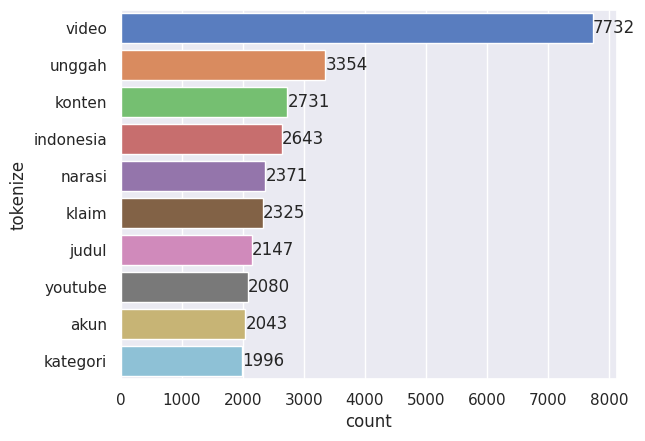

In [ ]:
word_tokenize = []
word_stemming = []
for document in data['tokenize']:
  for word in document:
    word_tokenize.append(word)
data_tokenize = pd.DataFrame({'tokenize':word_tokenize})

sns.set_theme(palette="muted")
abs_values = data_tokenize.value_counts(ascending=False)

ax = sns.countplot(y='tokenize', data=data_tokenize, order=data_tokenize['tokenize'].value_counts().iloc[:10].index)
ax.bar_label(container=ax.containers[0], labels=abs_values)

Perbandingan jumlah kata sebelum dan sesudah text preprocessing

In [ ]:
# Perbandingan jumlah kata sebelum dan sesudah text preprocessing
text1 = ' '.join(data['Isi'])
print('Total kata sebelum pre-processing adalah sebanyak {} kata'.format(len(text1)))
text2 = ' '.join(data['Judul_Parsed'])
print('Total kata setelah pre-processing adalah sebanyak {} kata'.format(len(text2)))

Total kata sebelum pre-processing adalah sebanyak 2953036 kata
Total kata setelah pre-processing adalah sebanyak 2030199 kata


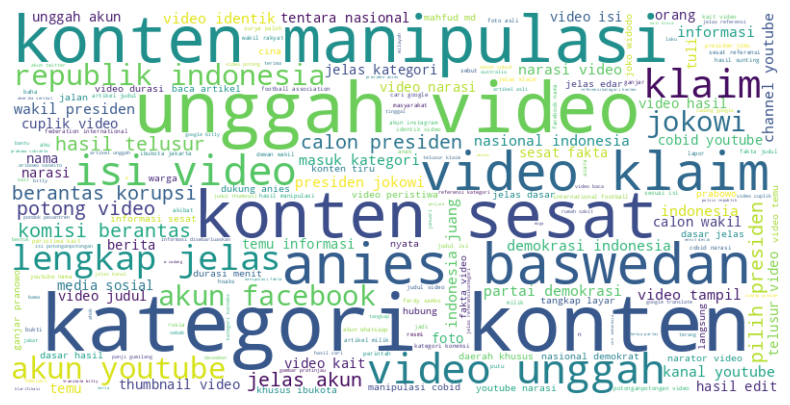

In [ ]:
# Words cloud
text = ' '.join(data['Judul_Parsed'])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Text Vectorization

In [ ]:
import gensim
from gensim import corpora, models

In [ ]:
# TEXT VECTORIZATION
# Membuat dictionary
dictionary = gensim.corpora.Dictionary(data['tokenize'])
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

print('\n\n')
dictionary.filter_extremes(no_below=5, no_above=0.7, keep_n=100000)
count = 0
for k, v in dictionary.iteritems():
    print(k, v)
    count += 1
    if count > 10:
        break

0 akun
1 bangun
2 bantu
3 berhatihati
4 contentkonten
5 dasar
6 edar
7 fakta
8 foto
9 hendri
10 imposter



0 akun
1 bangun
2 bantu
3 berhatihati
4 contentkonten
5 dasar
6 edar
7 fakta
8 foto
9 imposter
10 kait


In [ ]:
print(dictionary)

Dictionary<3014 unique tokens: ['akun', 'bangun', 'bantu', 'berhatihati', 'contentkonten']...>


In [ ]:
# describe bow
bow_doc_first = bow_corpus[33]
for i in range(len(bow_doc_first)):
    print(dictionary[bow_doc_first[i][0]])

akun
dasar
kait
masuk
milik
nama
pegawai
guna
isi
sesuai
facebook
facebookcobid
informasi
terima
hasil
tanggung
telusur
bupati
l
bentuk
calon
wajib
youtube
damping
g
ganjar
identik
manipulasi
pilih
temu
thumbnail
anies
artikel
jegal
judul
kanal
narator
nasional
presiden
sesat
tanggap
gambar
e
joko
jokowi
peristiwa
widodo
anis
baswedan
sosok
edit
duga
kompas
mahfud
md
potong
nyata
alas
bogor
es
gagal
golliat
index
kritik
megawati
nonaktif
ny
pimpin
pres
suap
tajam
tribun


In [ ]:
# create bow
bow_corpus = [dictionary.doc2bow(doc) for doc in data['tokenize']]
bow_corpus[:5]

[[(0, 5),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 4),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 2),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 1),
  (31, 1),
  (32, 2),
  (33, 2),
  (34, 1),
  (35, 4),
  (36, 7)],
 [(0, 6),
  (4, 1),
  (5, 1),
  (7, 1),
  (8, 3),
  (9, 1),
  (11, 2),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (21, 1),
  (23, 1),
  (26, 1),
  (27, 1),
  (32, 1),
  (33, 2),
  (34, 1),
  (36, 4),
  (37, 1),
  (38, 1),
  (39, 2),
  (40, 4),
  (41, 1),
  (42, 1),
  (43, 2),
  (44, 3),
  (45, 1),
  (46, 1),
  (47, 4),
  (48, 4),
  (49, 2),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 7),
  (55, 4),
  (56, 2),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1),
  (65, 2),
  (66, 2),
  (67, 2),
  (68, 1),
  (69, 6),
  (70, 2),
  (71, 1),
  (

In [ ]:
# describe bow
bow_doc_first = bow_corpus[33]
for i in range(len(bow_doc_first)):
    print("Kata {} (\"{}\") muncul sebanyak {} kali.".format(bow_doc_first[i][0],
                                                     dictionary[bow_doc_first[i][0]], bow_doc_first[i][1]))

Kata 0 ("akun") muncul sebanyak 1 kali.
Kata 5 ("dasar") muncul sebanyak 1 kali.
Kata 10 ("kait") muncul sebanyak 2 kali.
Kata 15 ("masuk") muncul sebanyak 1 kali.
Kata 18 ("milik") muncul sebanyak 2 kali.
Kata 21 ("nama") muncul sebanyak 1 kali.
Kata 25 ("pegawai") muncul sebanyak 1 kali.
Kata 51 ("guna") muncul sebanyak 1 kali.
Kata 53 ("isi") muncul sebanyak 2 kali.
Kata 72 ("sesuai") muncul sebanyak 1 kali.
Kata 79 ("facebook") muncul sebanyak 1 kali.
Kata 80 ("facebookcobid") muncul sebanyak 1 kali.
Kata 83 ("informasi") muncul sebanyak 2 kali.
Kata 100 ("terima") muncul sebanyak 1 kali.
Kata 113 ("hasil") muncul sebanyak 5 kali.
Kata 149 ("tanggung") muncul sebanyak 1 kali.
Kata 150 ("telusur") muncul sebanyak 1 kali.
Kata 160 ("bupati") muncul sebanyak 1 kali.
Kata 164 ("l") muncul sebanyak 1 kali.
Kata 175 ("bentuk") muncul sebanyak 1 kali.
Kata 216 ("calon") muncul sebanyak 1 kali.
Kata 270 ("wajib") muncul sebanyak 1 kali.
Kata 271 ("youtube") muncul sebanyak 2 kali.
Kata 280

In [ ]:
#TF-IDF
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]
from pprint import pprint
for doc in corpus_tfidf:
    pprint(doc)
    break

[(0, 0.09511602162370367),
 (1, 0.08981134638152753),
 (2, 0.07871571923111584),
 (3, 0.0996553139945179),
 (4, 0.08946205715960438),
 (5, 0.024158050918305255),
 (6, 0.03802189889742068),
 (7, 0.0144365063058832),
 (8, 0.03888895244803147),
 (9, 0.09870410764422782),
 (10, 0.025620075954414873),
 (11, 0.0868013388880086),
 (12, 0.2868799222182114),
 (13, 0.04394853027118686),
 (14, 0.14663581393935873),
 (15, 0.04459254871618181),
 (16, 0.0649005759016521),
 (17, 0.0951674814987946),
 (18, 0.031896638803159745),
 (19, 0.0968852438032439),
 (20, 0.1784631697088683),
 (21, 0.0310453142995318),
 (22, 0.094752552218632),
 (23, 0.1545554066716339),
 (24, 0.15409055930676016),
 (25, 0.1263335977826188),
 (26, 0.06553468567023786),
 (27, 0.1141839567836357),
 (28, 0.12871259957275347),
 (29, 0.14450312235474685),
 (30, 0.12750021801677924),
 (31, 0.16029364513674021),
 (32, 0.15408881174380976),
 (33, 0.1518072415956546),
 (34, 0.14892662232519013),
 (35, 0.48825250670158615),
 (36, 0.544247

In [ ]:
corpus_tfidf[33]

[(0, 0.01585615191879056),
 (5, 0.020136130532138752),
 (10, 0.0427095046207145),
 (15, 0.03716861864172214),
 (18, 0.05317274018908838),
 (21, 0.025876777197822904),
 (25, 0.10530111986882035),
 (51, 0.04988217131316086),
 (53, 0.046201890306439675),
 (72, 0.04308808536092143),
 (79, 0.0258330698700569),
 (80, 0.05449107714345194),
 (83, 0.026741616894654877),
 (100, 0.05961721806452584),
 (113, 0.10495156260507635),
 (149, 0.09453797878603222),
 (150, 0.010017959401289151),
 (160, 0.1017416123597275),
 (164, 0.08347009773994364),
 (175, 0.07315978841025496),
 (216, 0.05294468530213866),
 (270, 0.10092359243087759),
 (271, 0.03165303882003203),
 (280, 0.08744186146061725),
 (285, 0.07636640790498422),
 (286, 0.06561083933174056),
 (289, 0.17731705566499723),
 (293, 0.05175355439564581),
 (300, 0.35310472815123506),
 (311, 0.027688804073797233),
 (312, 0.08067863794964433),
 (320, 0.1783235223617497),
 (321, 0.044198941457545264),
 (333, 0.12222334906712236),
 (334, 0.05511141700681409

# S-BERT

## Sentence Embedding

In [ ]:
# S-BBERT

# Sentence embeddings
embedding_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = embedding_model.encode(data['Judul_Parsed'], show_progress_bar=True)

Batches:   0%|          | 0/51 [00:00<?, ?it/s]

## Dimensionality Reduction and Clustering

In [ ]:
# UMAP
umap_model = UMAP(n_components=3, n_neighbors=30, random_state=42, metric="cosine", verbose=True)
reduced_embeddings = umap_model.fit_transform(embeddings)

UMAP(angular_rp_forest=True, metric='cosine', n_components=3, n_neighbors=30, random_state=42, verbose=True)
Tue Oct 24 08:07:10 2023 Construct fuzzy simplicial set
Tue Oct 24 08:07:13 2023 Finding Nearest Neighbors
Tue Oct 24 08:07:17 2023 Finished Nearest Neighbor Search
Tue Oct 24 08:07:21 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Tue Oct 24 08:07:26 2023 Finished embedding


In [ ]:
# HDBSCAN
hdbscan_model = HDBSCAN(min_samples=10, gen_min_span_tree=True, prediction_data=False, min_cluster_size=20)
clusters = hdbscan_model.fit(reduced_embeddings).labels_

## BERTopic

In [ ]:
# BERTopic
topic_model= BERTopic(
        embedding_model=embedding_model,
        umap_model=umap_model,
        hdbscan_model=hdbscan_model,
        top_n_words=10,
        verbose=True
).fit(data['Judul_Parsed'])

Batches:   0%|          | 0/51 [00:00<?, ?it/s]

2023-10-24 08:23:15,008 - BERTopic - Transformed documents to Embeddings


UMAP(angular_rp_forest=True, metric='cosine', n_components=3, n_neighbors=30, random_state=42, verbose=True)
Tue Oct 24 08:23:15 2023 Construct fuzzy simplicial set
Tue Oct 24 08:23:17 2023 Finding Nearest Neighbors
Tue Oct 24 08:23:17 2023 Finished Nearest Neighbor Search
Tue Oct 24 08:23:17 2023 Construct embedding


Epochs completed:   0%|            0/500 [00:00]

	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs


2023-10-24 08:23:23,044 - BERTopic - Reduced dimensionality
2023-10-24 08:23:23,112 - BERTopic - Clustered reduced embeddings


Tue Oct 24 08:23:23 2023 Finished embedding


In [ ]:
# Menampilkan topik yang terbentuk
topics = topic_model.get_topics()
topics

{-1: [('video', 0.03341600327416258),
  ('konten', 0.026921409037008893),
  ('akun', 0.02667477743126887),
  ('unggah', 0.02568944751858958),
  ('informasi', 0.02503815708280489),
  ('kategori', 0.02189064864232614),
  ('jelas', 0.020977047308542315),
  ('indonesia', 0.02019956540509737),
  ('narasi', 0.019873647727387988),
  ('klaim', 0.019821876632557058),
  ('fakta', 0.019515045148063195),
  ('youtube', 0.018560650599254856),
  ('artikel', 0.01839416945237062),
  ('facebook', 0.018305518452973166),
  ('judul', 0.018305038450589412),
  ('sesat', 0.01765510204219537),
  ('telusur', 0.01702327594919877),
  ('milik', 0.01657531683902676),
  ('resmi', 0.01655769708370795),
  ('hasil', 0.014893864004011152),
  ('referensi', 0.014777740453608811),
  ('orang', 0.014295248219742079),
  ('bank', 0.01404741443711373),
  ('edar', 0.013685177408123663),
  ('nama', 0.013584020329522049)],
 0: [('video', 0.06526594396704333),
  ('unggah', 0.03814467183969847),
  ('indonesia', 0.031022073460153156)

In [ ]:
# Menampilkan jumlah dokumen per topik
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,339,-1_video_konten_akun_unggah,"[video, konten, akun, unggah, informasi, kateg...",[akun palsu giat bagibagi hadiah baim orang ...
1,0,919,0_video_unggah_indonesia_youtube,"[video, unggah, indonesia, youtube, narasi, pr...",[ informasi sesat fakta telusur thumbnail v...
2,1,97,1_akun_whatsapp_tiru_palsu,"[akun, whatsapp, tiru, palsu, kota, mengatasna...",[ akun instagram resmi kabupaten bogor nyata ...
3,2,86,2_foto_manipulasi_hasil_jelas,"[foto, manipulasi, hasil, jelas, asli, unggah,...",[akun palsu akun facebook asli milik raffi ahm...
4,3,44,3_football_federation_international_association,"[football, federation, international, associat...",[informasi sesat anggota exco pssi arya sinuli...
5,4,37,4_gambar_artikel_asli_judul,"[gambar, artikel, asli, judul, layar, sunting,...",[ gambar sunting judul fakta tangkap lay...
6,5,31,5_gula_makan_darah_obat,"[gula, makan, darah, obat, sakit, konsumsi, st...",[ fakta pakar kanker sebut bukti kurang kon...
7,6,29,6_cadang_bitly_google_pratinjau,"[cadang, bitly, google, pratinjau, hasil, vide...",[sesat judul umpan klik fakta gambar pratinj...
8,7,26,7_vaksin_covid_virus_vaksinasi,"[vaksin, covid, virus, vaksinasi, sakit, sebab...",[ fakta artikel jurnal teliti dasar klaim ...


In [ ]:
# Penghitungan nilai koherensi
vectorizer = topic_model.vectorizer_model
analyzer = vectorizer.build_analyzer()

words = vectorizer.get_feature_names_out()
tokens = [analyzer(doc) for doc in data['Judul_Parsed']]
dictionary = corpora.Dictionary(tokens)
corpus = [dictionary.doc2bow(token) for token in tokens]

topic_words = [[words for words, _ in topic_model.get_topic(topic) if words!='']
               for topic in range(len(set(topics))-1)]

coherence_model = CoherenceModel(topics=topic_words,
                                 texts=tokens,
                                 corpus=corpus,
                                 dictionary=dictionary,
                                 coherence='c_v')
coherence = coherence_model.get_coherence()
coherence

0.5577803808423982

In [ ]:
# Menampilkan topik dan probabilitas yang mewakili tiap dokumen
representative_doc = topic_model.get_document_info(data['Judul_Parsed'])
representative_doc

,Document,Topic,Name,Representation,Representative_Docs,Top_n_words,Probability,Representative_document
0,hendri patah klarifikasi akun whatsapp edar...,1,1_akun_whatsapp_tiru_palsu,"[akun, whatsapp, tiru, palsu, kota, mengatasna...",[ akun instagram resmi kabupaten bogor nyata ...,akun - whatsapp - tiru - palsu - kota - mengat...,0.972731,False
1,dinas didik provinsi kalimantan klarifikasi ...,-1,-1_video_konten_akun_unggah,"[video, konten, akun, unggah, informasi, kateg...",[akun palsu giat bagibagi hadiah baim orang ...,video - konten - akun - unggah - informasi - k...,0.000000,False
2,apolo safanpo konfirmasi akunakun edar pal...,1,1_akun_whatsapp_tiru_palsu,"[akun, whatsapp, tiru, palsu, kota, mengatasna...",[ akun instagram resmi kabupaten bogor nyata ...,akun - whatsapp - tiru - palsu - kota - mengat...,0.856004,False
3,pesan palsu menteri sehat republik indonesia ...,1,1_akun_whatsapp_tiru_palsu,"[akun, whatsapp, tiru, palsu, kota, mengatasna...",[ akun instagram resmi kabupaten bogor nyata ...,akun - whatsapp - tiru - palsu - kota - mengat...,0.762756,False
4,akun media sosial resmi suswandi akun wha...,1,1_akun_whatsapp_tiru_palsu,"[akun, whatsapp, tiru, palsu, kota, mengatasna...",[ akun instagram resmi kabupaten bogor nyata ...,akun - whatsapp - tiru - palsu - kota - mengat...,0.845076,False
...,...,...,...,...,...,...,...,...
1603,fakta berita valid benar mahfud md diresh...,0,0_video_unggah_indonesia_youtube,"[video, unggah, indonesia, youtube, narasi, pr...",[ informasi sesat fakta telusur thumbnail v...,video - unggah - indonesia - youtube - narasi ...,1.000000,False
1604,pandan wangi sukma listyono putri postingan ...,0,0_video_unggah_indonesia_youtube,"[video, unggah, indonesia, youtube, narasi, pr...",[ informasi sesat fakta telusur thumbnail v...,video - unggah - indonesia - youtube - narasi ...,1.000000,False
1605,hasil periksafakta konten manipulasi video e...,0,0_video_unggah_indonesia_youtube,"[video, unggah, indonesia, youtube, narasi, pr...",[ informasi sesat fakta telusur thumbnail v...,video - unggah - indonesia - youtube - narasi ...,1.000000,False
1606,atur daerah keluar wali kota surakarta gibr...,1,1_akun_whatsapp_tiru_palsu,"[akun, whatsapp, tiru, palsu, kota, mengatasna...",[ akun instagram resmi kabupaten bogor nyata ...,akun - whatsapp - tiru - palsu - kota - mengat...,0.972731,False


In [ ]:
# Visualisasi words cloud tiap topik
def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

create_wordcloud(topic_model, topic=7)